In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_index=pd.read_csv('economic_index.csv')

In [3]:
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [4]:
df_index.drop(columns=['Unnamed: 0','month','year'],inplace=True)

In [5]:
df_index.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [6]:
import seaborn as sns

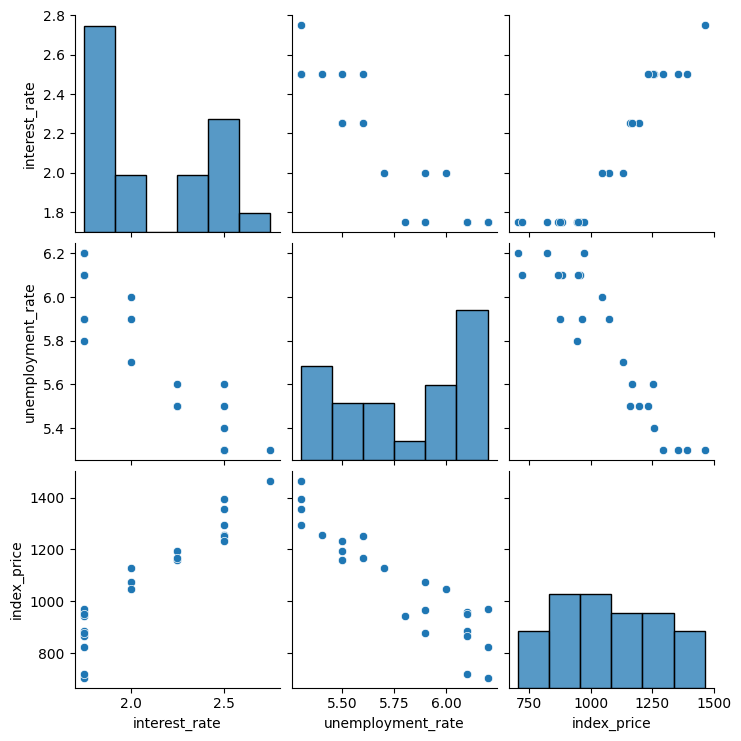

In [7]:
sns.pairplot(df_index)

In [8]:
df_index.corr

<bound method DataFrame.corr of     interest_rate  unemployment_rate  index_price
0            2.75                5.3         1464
1            2.50                5.3         1394
2            2.50                5.3         1357
3            2.50                5.3         1293
4            2.50                5.4         1256
5            2.50                5.6         1254
6            2.50                5.5         1234
7            2.25                5.5         1195
8            2.25                5.5         1159
9            2.25                5.6         1167
10           2.00                5.7         1130
11           2.00                5.9         1075
12           2.00                6.0         1047
13           1.75                5.9          965
14           1.75                5.8          943
15           1.75                6.1          958
16           1.75                6.2          971
17           1.75                6.1          949
18           1.75 

In [9]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


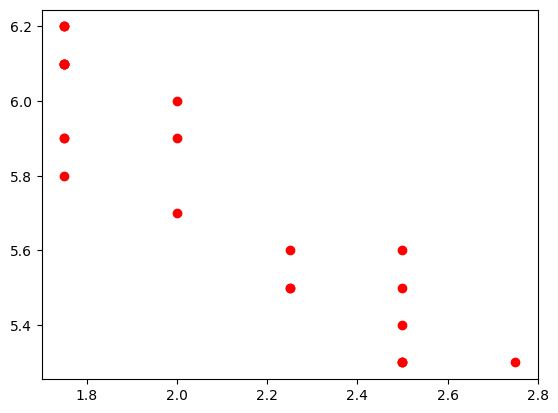

In [11]:
plt.scatter(df_index['interest_rate'],df_index['unemployment_rate'],color='r')

In [12]:
df=df_index

In [13]:

X=df.iloc[ : , : -1]

In [14]:
y=df.iloc[: , -1]

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
scaler=StandardScaler()                               

In [22]:
X_train=scaler.fit_transform(X_train)

In [23]:
X_test=scaler.fit_transform(X_test)

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
regresssion=LinearRegression()

In [26]:
regresssion.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [27]:
from sklearn.model_selection import cross_val_score
validation=cross_val_score(regresssion,X_train,y_train,scoring='neg_mean_squared_error',
                           cv=3)

In [28]:
np.mean(validation)

np.float64(-5914.828180162386)

In [29]:
y_pread=regresssion.predict(X_test)

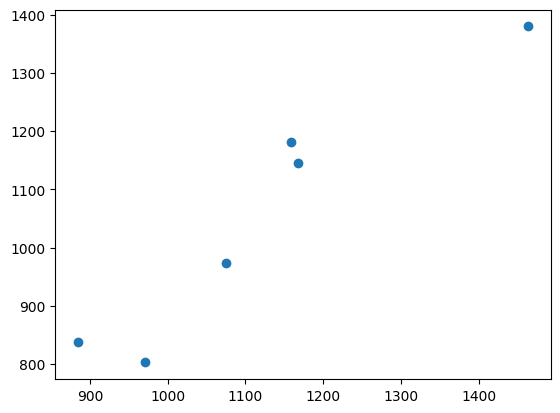

In [30]:
plt.scatter(y_test,y_pread)

In [31]:
residuals = y_test-y_pread

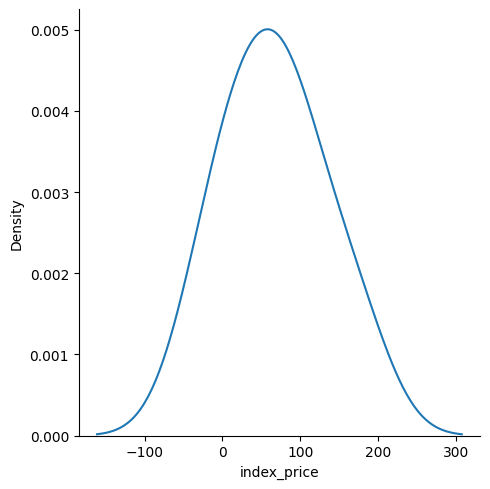

In [32]:
sns.displot(residuals,kind='kde')

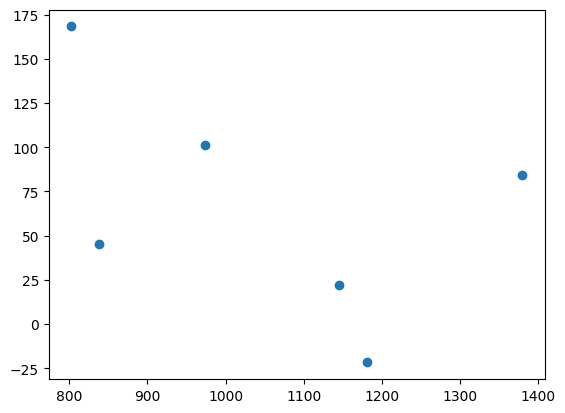

In [33]:
plt.scatter(y_pread,residuals)